#*`End-to-end Multi-Class.. Project By Mohammed Salf Shaeerah 🦸🏻‍♂️`*

# `0- Install Libraries ⌛`

In [53]:
# To manage if the data has sort of imbalances
! pip install imbalanced-learn

# To Optimize the model
! pip install scikit-optimize

# *`1- Import Libraries 🔨`*


In [54]:
# Import Common Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Saving Tools
import joblib
import json

# Import Split Tool
from sklearn.model_selection import train_test_split

# Import Matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Import Models
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

#
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Import Tuning Tools
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

# Import This 👇🏻 To Avoid Future Warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# *` 2- Read, Understand, & Interpret the data 🙇`*

In [55]:
train_datapath = "train (1).csv"

train_df = pd.read_csv(train_datapath, index_col= "Id")

# Explore a random sample of data
train_df.sample(10)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,,,,,,,,,,,,,,,,,
1509,Perfume Genius,Otherside,57.0,0.279,0.137,8.0,-11.450,1,0.0381,0.906000,0.000494,0.2230,0.206,142.848,160169.0,3,6
10134,Bobby Verne,Red Hot Car,27.0,0.299,0.578,9.0,-7.567,1,0.0341,0.670000,0.000071,0.1250,0.707,90.612,154680.0,4,10
4704,Oceans,My Own Summer (Shove It),35.0,0.375,0.958,7.0,-4.931,1,0.1150,0.000722,0.002080,0.2650,0.299,72.238,218051.0,4,8
14244,Martin Jensen,2019,69.0,0.876,0.765,9.0,-6.554,0,0.2690,0.119000,0.000005,0.0826,0.729,115.072,131381.0,4,9
7023,The Hirsch Effekt,Torka,16.0,0.138,0.883,10.0,-6.656,0,0.0885,0.000273,0.283000,0.1590,0.116,171.903,381133.0,5,8
9576,Soundgarden,Rusty Cage,63.0,0.307,0.917,9.0,-7.599,1,0.0977,0.000017,0.000440,0.0566,0.266,101.879,266200.0,4,10
6114,Lil Durk,Stay Down (with 6LACK & Young Thug),63.0,0.813,0.570,3.0,-8.409,0,0.2650,0.090900,NaN,0.0982,0.676,109.070,169330.0,4,5
12436,Hozier,"Wasteland, Baby!",57.0,0.427,0.407,2.0,-9.665,1,0.0382,0.612000,0.386000,0.1090,0.244,168.844,266467.0,4,9
2354,Ozzy Osbourne,Dreamer,65.0,0.493,0.636,1.0,-7.408,1,0.0256,0.062900,0.000002,0.0921,0.279,79.419,284907.0,4,10


In [56]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,14063.0,44.525208,17.418940,1.000000,33.000000,44.00000,56.00000,100.000
danceability,14396.0,0.543105,0.165517,0.059600,0.432000,0.54500,0.65800,0.989
energy,14396.0,0.662422,0.235967,0.001210,0.508000,0.69900,0.86100,1.000
key,12787.0,5.953781,3.200013,1.000000,3.000000,6.00000,9.00000,11.000
loudness,14396.0,-7.900852,4.057362,-39.952000,-9.538000,-7.01350,-5.16200,1.342
mode,14396.0,0.640247,0.479944,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,14396.0,0.080181,0.085157,0.022500,0.034800,0.04710,0.08310,0.955
acousticness,14396.0,0.246746,0.310922,0.000000,0.004280,0.08145,0.43225,0.996
instrumentalness,10855.0,0.178129,0.304266,0.000001,0.000088,0.00392,0.20100,0.996
liveness,14396.0,0.195782,0.159258,0.011900,0.097275,0.12900,0.25600,0.992


In [57]:
(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14396 entries, 1 to 14396
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

Missing Values Are:
👇🏼--------------------👇🏼
Popularity           333
key                 1609
instrumentalness    3541
dtype: int64



Text(0.5, 0, 'Data Missing Values')

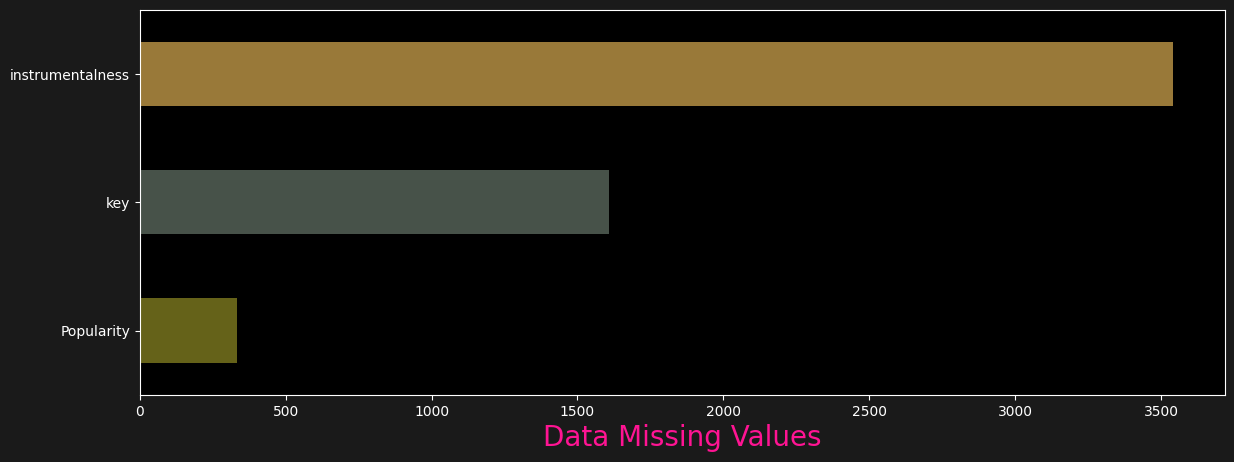

In [58]:
from numpy.ma.core import size

fig = plt.figure(figsize=(14, 5))
fig.set_facecolor('0.1')

# Let's check the columns that have a missing values
print("Missing Values Are:")
print("👇🏼--------------------👇🏼")
print((train_df.isnull().sum())[train_df.columns[train_df.isnull().sum() != 0]])
print()

# Plotting to show the missing values
plt.style.use('dark_background')

((train_df.isnull().sum())[train_df.columns[train_df.isnull().sum() != 0]]).plot(
    kind='barh', color= ['#656219', '#475249', '#997939'])

# put a name to x axis
plt.xlabel("Data Missing Values", color='deeppink', size=20)

Data Types Are
👇🏼----------👇🏼
float64    12
int64       3
object      2
dtype: int64



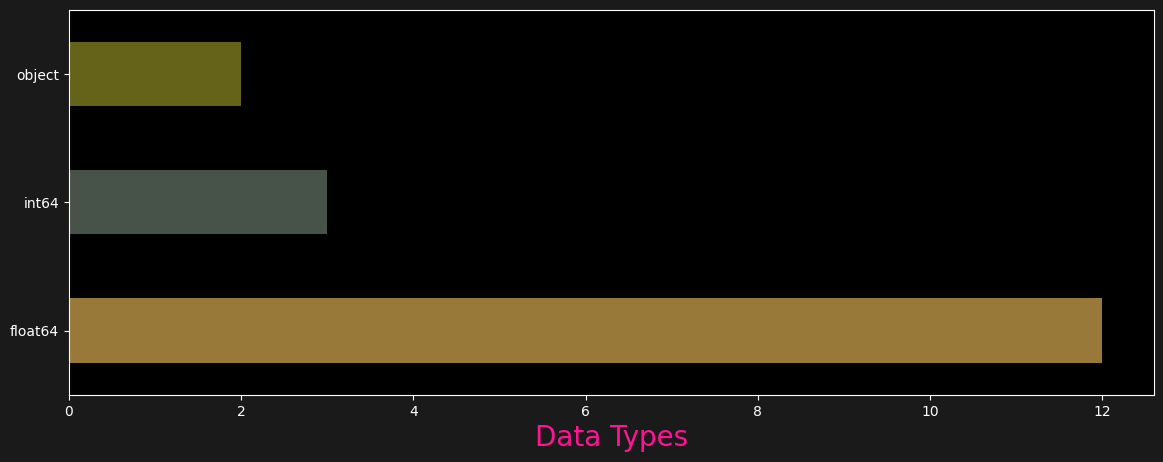

In [59]:
# Set Canvus Figure
fig = plt.figure(figsize=(14, 5))
fig.set_facecolor('0.1')
plt.style.use('tableau-colorblind10')

# Check data types
print("Data Types Are")
print("👇🏼----------👇🏼")
print(train_df.dtypes.value_counts())
print()

# Check data types by plotting
train_df.dtypes.value_counts().plot(kind='barh', color=['#997939', '#475249', '#656219'])

# put a name to x axis
plt.xlabel("Data Types", color='deeppink', size=20);

In [60]:
# Check the duplicated values
assert (train_df.duplicated().sum() == 0)

- No Output, that's mean no duplicated value 🤗

In [61]:
train_df.Class.value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

I see an imbalance in classes ⚖️

In [62]:
# Features Correleation with Target
train_df.corr()['Class'].sort_values(ascending=False)

Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
key                  -0.004175
instrumentalness     -0.028631
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64

Top positive correlation with Class is around 20% 🤨

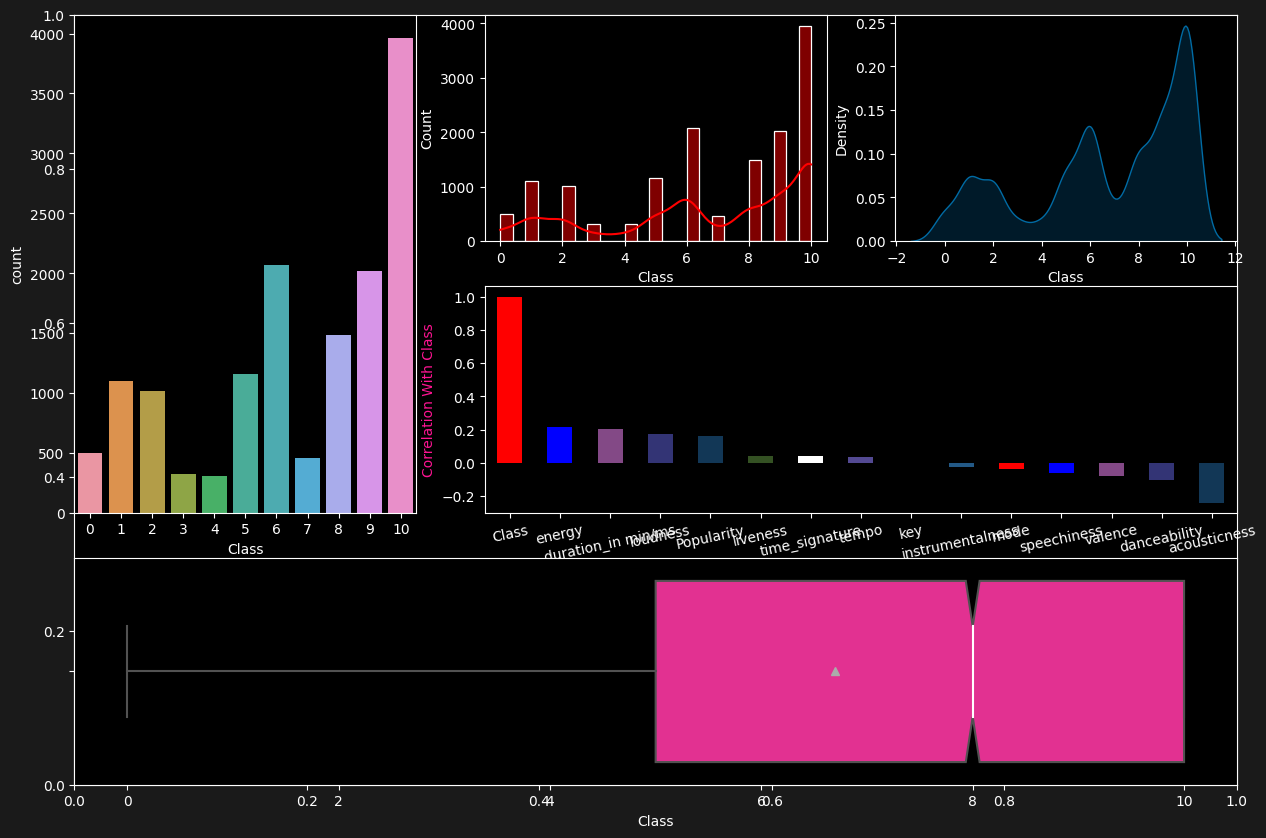

In [63]:
# Class [target]

from numpy import mean
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):
    sns.countplot(data= train_df, x= 'Class', ax=ax["A"])

    sns.histplot(data=train_df, x= 'Class', color= 'r', kde=True, ax=ax["B"])

    sns.kdeplot(data =train_df, x ='Class', fill =True, ax =ax["C"])

    train_df.corr()['Class'].sort_values(ascending=False).plot(kind='bar', color=colors, ax=ax["D"])
    ax['D'].set_ylabel('Correlation With Class', color='deeppink')
    ax['D'].tick_params(axis='x', rotation=12)

    sns.boxplot(data=train_df, x= 'Class', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# Insights about Class 🔆
- Left skewness (Not Normally Distributed)
- Classes that have more values are 10, 6, 9
- Feature that has high positive correlation with Class is energy
- Feature that has high negative correlation with class is acousticness
- Classes distributed in an imbalanced pattern 👉 Classes mean is ~ 6.5, median is ~ 8.0

In [64]:
# energy variable
train_df.energy.value_counts().sort_values(ascending=False)

0.9480    43
0.9140    43
0.9710    42
0.9310    42
0.9470    41
          ..
0.0450     1
0.0359     1
0.0529     1
0.0425     1
0.0833     1
Name: energy, Length: 1156, dtype: int64

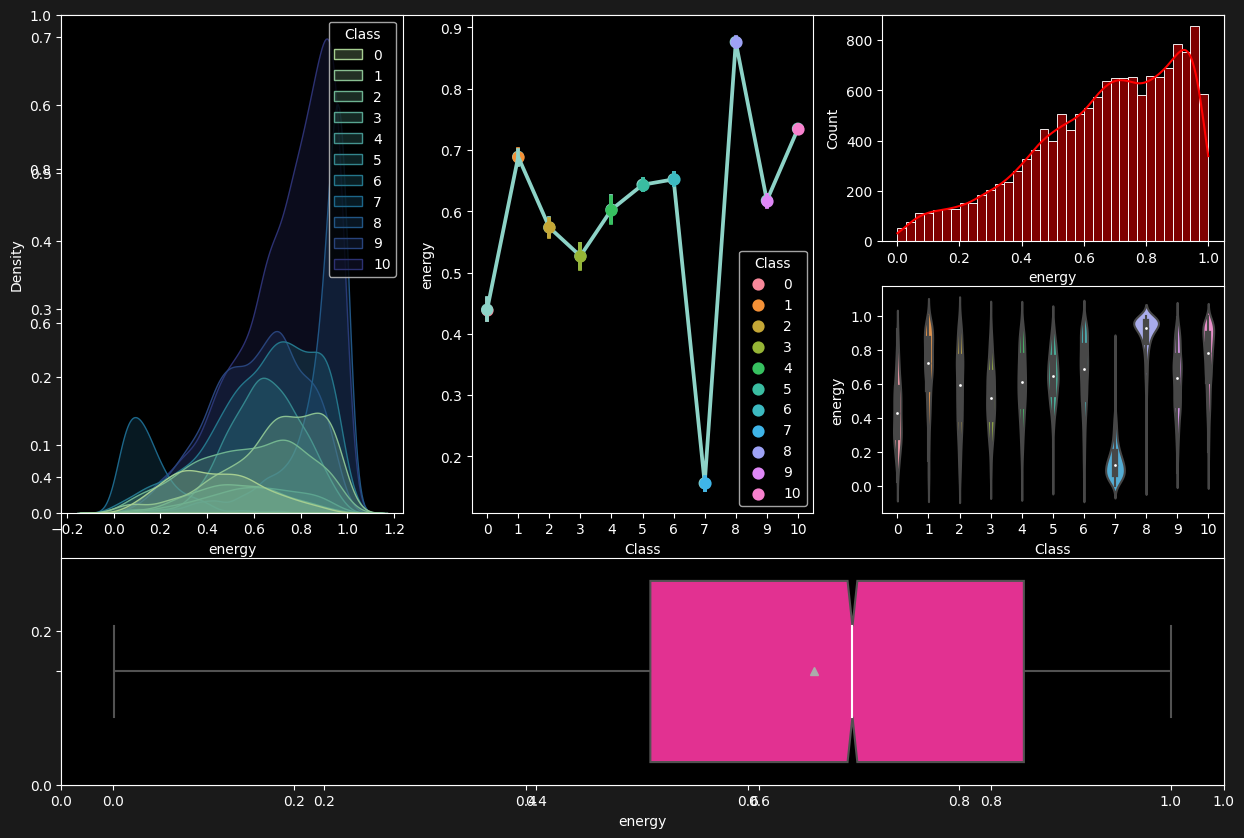

In [65]:
# energy variable

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ABD
    EEE
    """
)

with plt.style.context('dark_background'):
    sns.kdeplot(data =train_df, x ='energy', hue ='Class', fill =True, palette= 'crest', ax =ax["A"])

    sns.pointplot(data=train_df, x="Class", y="energy", hue="Class", ax= ax["B"])
    sns.pointplot(data=train_df, x="Class", y="energy", ax= ax["B"])

    sns.histplot(data=train_df, x='energy', color ='r', kde=True, ax=ax["C"])

    sns.violinplot(data=train_df, x="Class", y="energy", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'energy', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# Insights about energy variable 🔆
- Left skewness
- by looking to violinplot, we see that class 7 has less energy but class 8 has the highest
- by looking to pointplot, also, we see class 7 has lowest energy & 8 has the highest
- see the code below 👇🏻

In [66]:
print(train_df['energy'].groupby(train_df['Class']).mean().sort_values(ascending=True))
print('----------------------------')

print(train_df['energy'].groupby(train_df['Class']).min().sort_values(ascending=True))
print('----------------------------')

print(train_df['energy'].groupby(train_df['Class']).max().sort_values(ascending=True))
print('----------------------------')

Class
7     0.156317
0     0.439463
3     0.526979
2     0.573651
4     0.602628
9     0.617447
5     0.643204
6     0.652035
1     0.688784
10    0.734699
8     0.876008
Name: energy, dtype: float64
----------------------------
Class
7     0.00121
6     0.00124
1     0.01230
8     0.01670
2     0.01710
0     0.02280
5     0.02920
4     0.04000
3     0.04400
10    0.05960
9     0.07460
Name: energy, dtype: float64
----------------------------
Class
7     0.816
0     0.922
4     0.961
3     0.969
5     0.983
9     0.995
2     0.997
1     0.998
6     0.998
10    0.999
8     1.000
Name: energy, dtype: float64
----------------------------


Note, the information here is the same on the plot above 🔱

In [67]:
# duration_in min/ms 👉🏽 Time of the song
train_df['duration_in min/ms'].value_counts()

192000.000000    11
230000.000000     9
216000.000000     8
235000.000000     7
220000.000000     7
                 ..
238773.000000     1
157714.000000     1
2.599200          1
233908.000000     1
2.614567          1
Name: duration_in min/ms, Length: 11805, dtype: int64

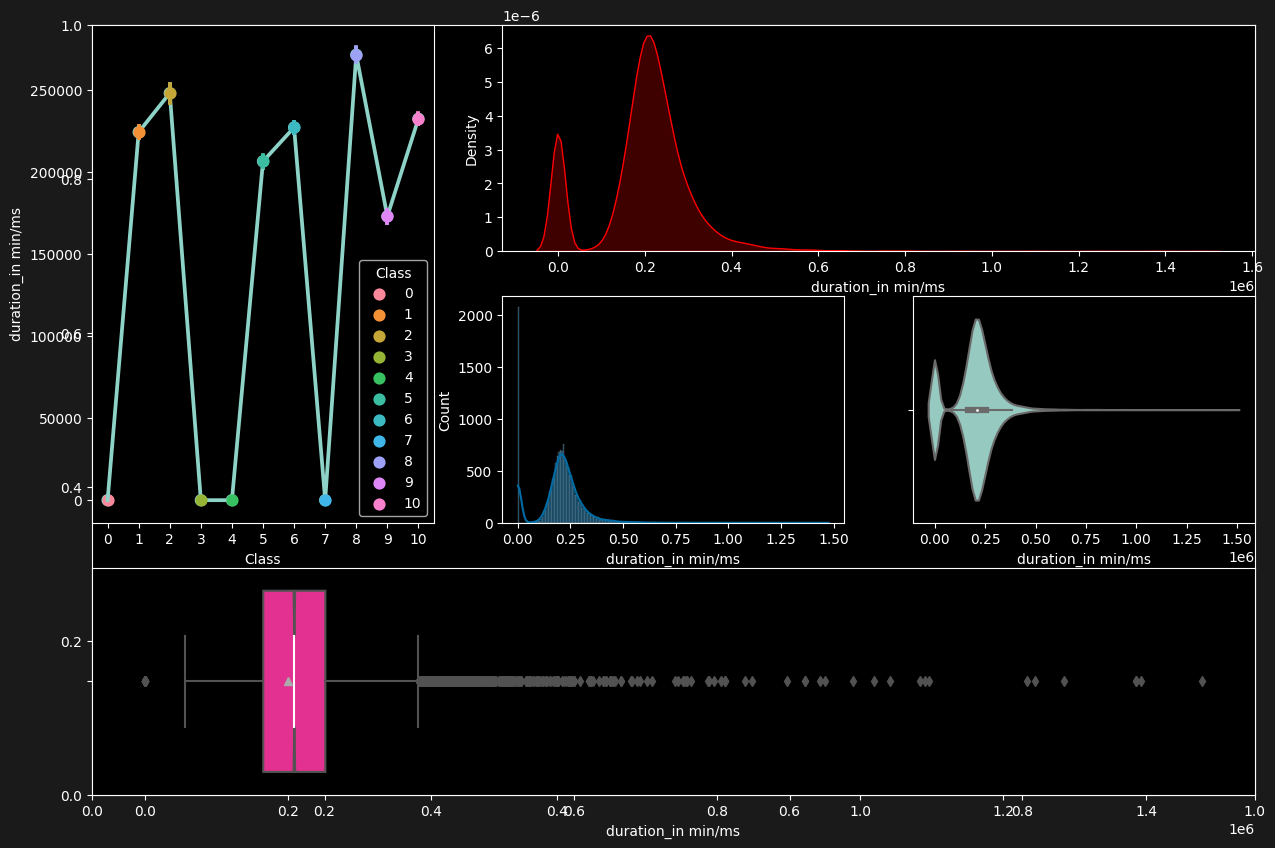

In [68]:
# duration_in min/ms 👉🏽 Time of the song

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABB
    ACD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.pointplot(data=train_df, x="Class", y="duration_in min/ms", ax= ax["A"])
    sns.pointplot(data=train_df, x="Class", y="duration_in min/ms", hue="Class", ax= ax["A"])

    sns.kdeplot(data =train_df, x ='duration_in min/ms', fill =True, color= 'r', ax =ax["B"])

    sns.histplot(data=train_df, x=(train_df['duration_in min/ms']/1e6), kde=True, ax=ax["C"])

    sns.violinplot(data=train_df, x= "duration_in min/ms", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'duration_in min/ms', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# Insights about duration_in min/ms 🔆
- by looking to pointplot, we see classes 0, 3, 4 & 7 are have less duration
- Outliers are clear
- by lookiing to boxplot & violinplot, we see that the mean & median are nearly the same
- may be right skewness

In [69]:
# loudness
train_df.loudness.value_counts().sort_values(ascending=False)

-5.497     12
-4.261     10
-4.818     10
-5.576      8
-5.659      8
           ..
-13.649     1
-17.128     1
-9.844      1
-1.894      1
-11.520     1
Name: loudness, Length: 8051, dtype: int64

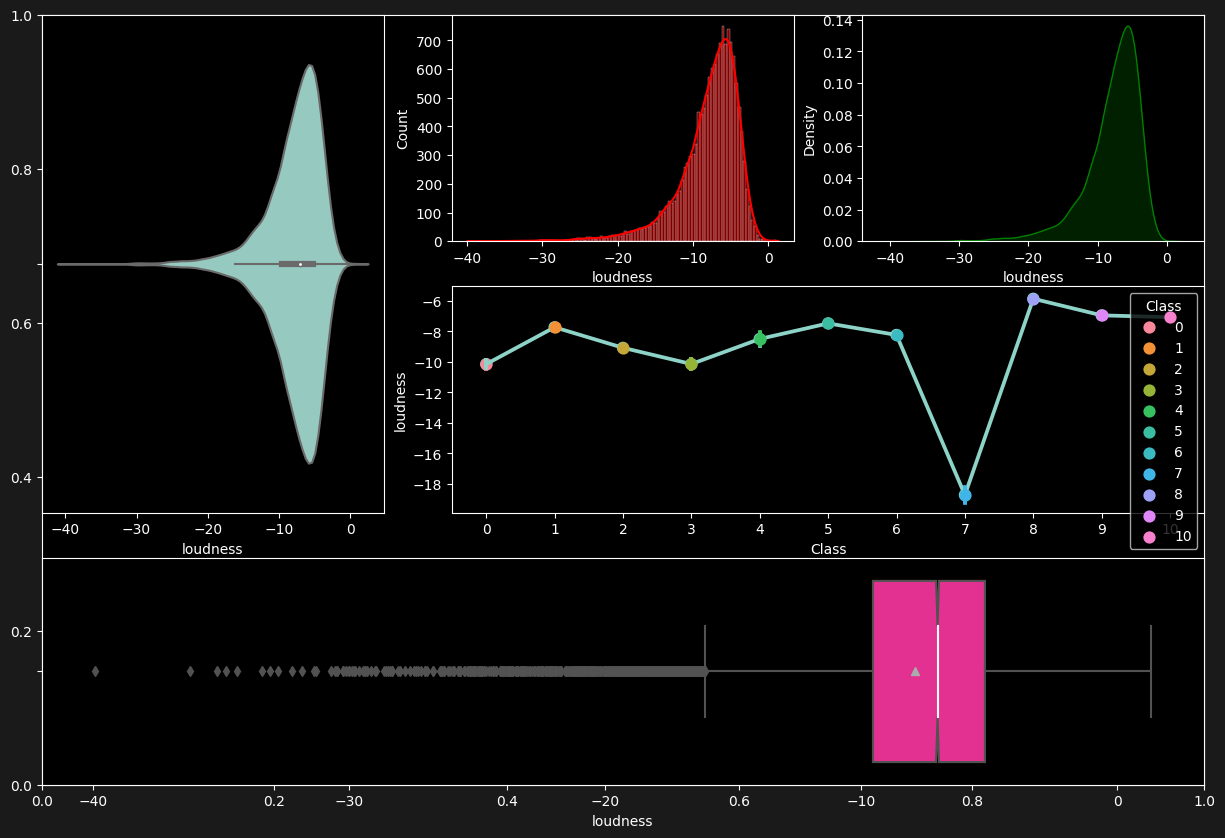

In [70]:
# loudness

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.violinplot(data=train_df, x= "loudness", ax= ax["A"])

    sns.histplot(data=train_df, x='loudness', color= 'r', kde=True, ax=ax["B"])

    sns.kdeplot(data=train_df, x='loudness', color= 'g', fill=True, ax=ax["C"])

    sns.pointplot(data=train_df, x="Class", y="loudness", ax= ax["D"])
    sns.pointplot(data=train_df, x="Class", y="loudness", hue="Class", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'loudness', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# Insights about Loudness 🔆
- boxplot shows 👉🏼 mean & median are nearly the same, that's mean most data points are normally distributed
- but there are an outliers 👉🏼 that's mean there is some sort of left skeweed
- class 7 has lowest loudness but 8 is the highest   

In [71]:
# Popularity 👉🏻 How much the song is famous?
train_df.Popularity.value_counts().sort_values(ascending=False)

42.0     371
41.0     357
34.0     348
43.0     343
44.0     333
        ... 
97.0       3
96.0       2
100.0      2
98.0       1
99.0       1
Name: Popularity, Length: 100, dtype: int64

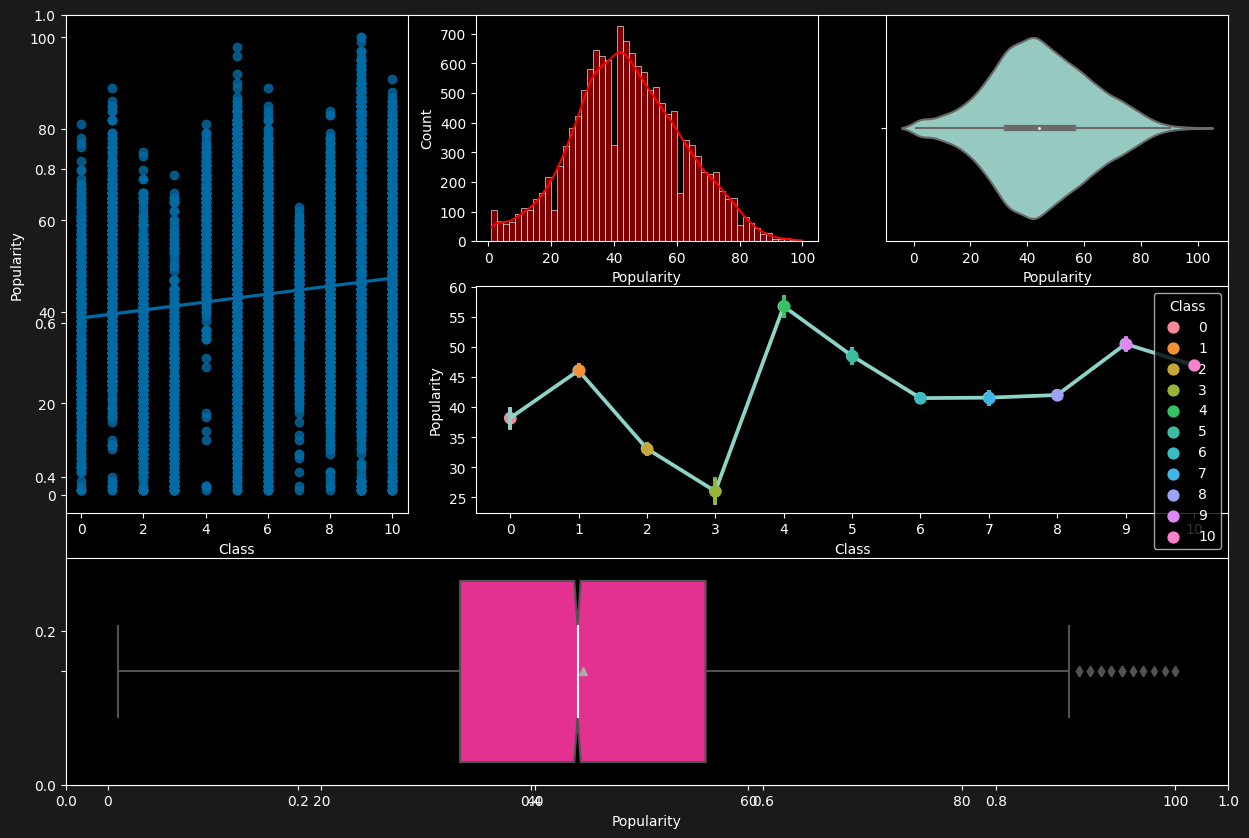

In [72]:
# Popularity 👉🏻 How much the song is famous?

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):
  sns.regplot(data= train_df, x= 'Class', y= 'Popularity', ax=ax["A"])

  sns.histplot(data=train_df, x='Popularity', color= 'r', kde=True, ax=ax["B"])

  sns.violinplot(data=train_df, x= "Popularity", ax= ax["C"])

  #sns.scatterplot(data= train_df, x= 'Popularity', y= 'energy', ax=ax["D"])

  sns.pointplot(data=train_df, x="Class", y="Popularity", ax= ax["D"])
  sns.pointplot(data=train_df, x="Class", y="Popularity", hue="Class", ax= ax["D"])

  sns.boxplot(data=train_df, x= 'Popularity', showmeans= True,
              color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# Insights about Popularity 🔆
- ~ Normal distributed
- By looking to regplot, we see that Class 9 & 5 have songs are high famoues
- but Class 7 has songs are less famous


In [73]:
# liveness
train_df.liveness.value_counts().sort_values(ascending=False)

0.1100    172
0.1090    166
0.1110    158
0.1120    153
0.1070    150
         ... 
0.0501      1
0.8840      1
0.5300      1
0.5500      1
0.6710      1
Name: liveness, Length: 1407, dtype: int64

In [74]:
# A value above 0.8 provides strong likelihood that the track is live
((train_df.liveness[train_df.liveness >= 0.8]).value_counts())

0.801    4
0.950    4
0.811    4
0.853    4
0.879    4
        ..
0.933    1
0.889    1
0.896    1
0.836    1
0.957    1
Name: liveness, Length: 115, dtype: int64

In [75]:
# Let's count the number of songs that performed live
len(train_df.liveness[train_df.liveness >= 0.8])

195

In [76]:
train_df[train_df.liveness >= 0.8]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,,,,,,,,,,,,,,,,,
335,Franz Ferdinand,Do You Want To,62.0,0.412,0.944,NaN,-2.896,1,0.0448,0.07240,0.000493,0.801,0.790,123.091,215000.000000,4,10
446,Dudu Tassa,Lola,14.0,0.348,0.610,11.0,-6.015,0,0.0583,0.71000,0.000666,0.971,0.241,145.115,265300.000000,4,10
576,George Michael,"Freedom! '90 - Live from MTV Unplugged, 1996",48.0,0.684,0.834,1.0,-10.652,0,0.0498,0.03110,NaN,0.889,0.676,94.039,6.036950,4,9
594,AURAGRAPH,Sky Plaza - Áå´ „Ç∑ Corp. Remix,33.0,0.695,0.664,10.0,-15.110,0,0.0304,0.54900,0.860000,0.899,0.863,127.284,163625.000000,4,6
676,Steve Miller Band,Winter Time,25.0,0.314,0.768,9.0,-7.713,0,0.0588,0.46400,0.041900,0.979,0.419,94.369,410280.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14243,Michael Bublé,Everything - Live from Madison Square Garden,37.0,0.628,0.722,9.0,-7.702,1,0.0482,0.45300,NaN,0.962,0.446,123.999,3.619550,4,9
14285,Enter Shikari,thƒì kƒ≠√±g,39.0,0.526,0.878,NaN,-6.793,1,0.0835,0.01810,NaN,0.834,0.627,148.104,168927.000000,4,10
14293,Backstreet Boys,In a World Like This - Live in Japan,17.0,0.528,0.835,7.0,-5.863,1,0.0384,0.00013,0.000207,0.923,0.542,125.020,3.878933,4,9


The number of songs that performed live is 195 📷
- which is very little if we comper with other songs!!

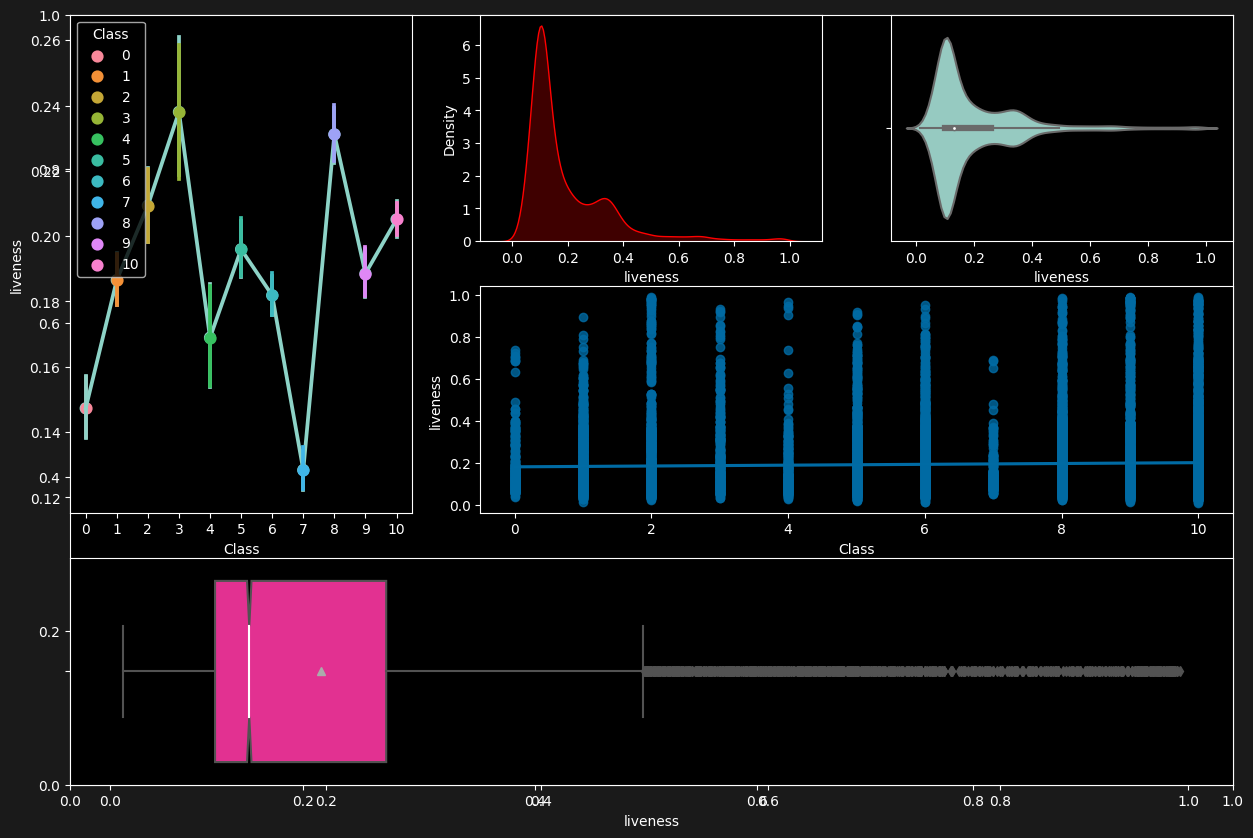

In [77]:
# liveness

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.pointplot(data=train_df, x="Class", y="liveness", ax= ax["A"])
    sns.pointplot(data=train_df, x="Class", y="liveness", hue="Class", ax= ax["A"])

    sns.kdeplot(data =train_df, x ='liveness', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'liveness', ax=ax["C"])

    sns.regplot(data= train_df, x= 'Class', y= 'liveness', ax=ax["D"])

    sns.boxplot(data=train_df, x= 'liveness', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# Insights about liveness🔆
- Most songs not performed live, look to kde & violinplot to see that most data points are around 0.2
- outliers are clear
- mean & median awey from each other

In [78]:
# time_signature
train_df.time_signature.value_counts().sort_values(ascending=False)

4    13149
3      994
5      166
1       87
Name: time_signature, dtype: int64

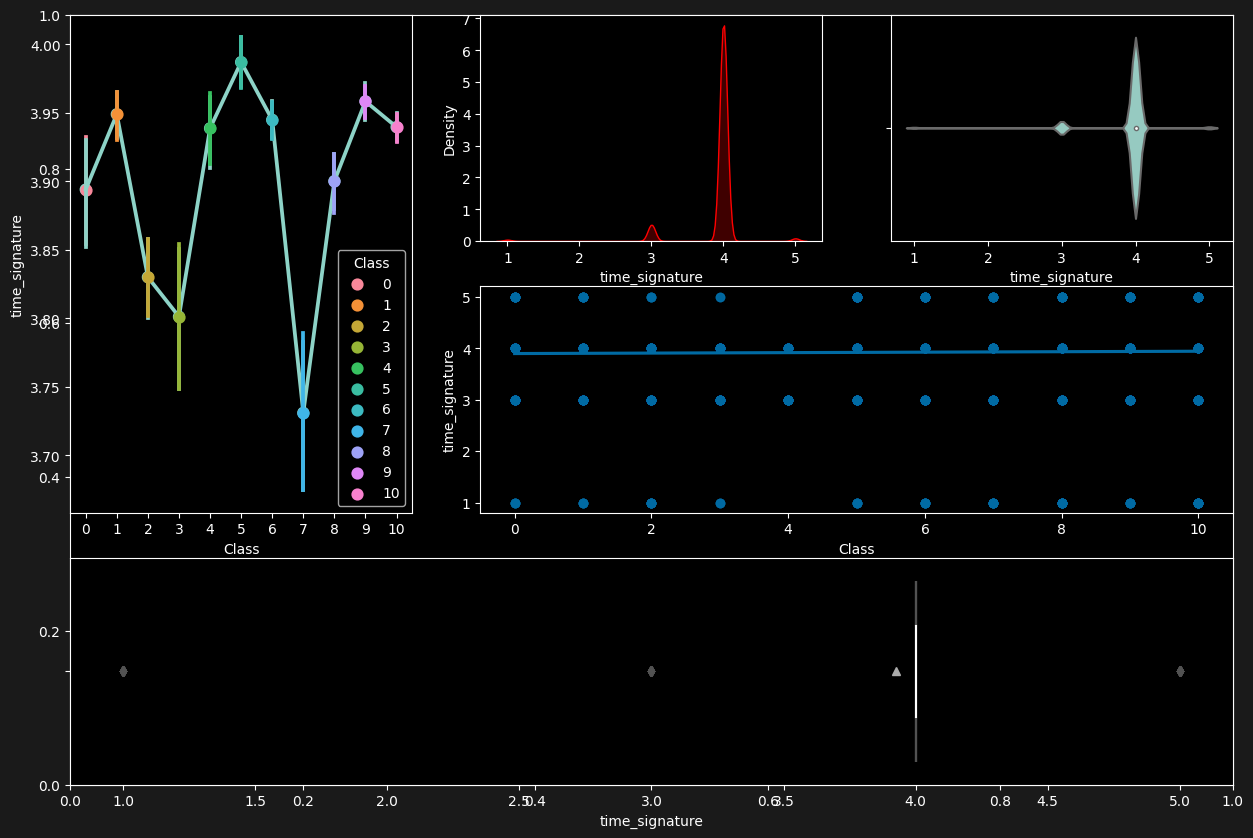

In [79]:
# time_signature

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.pointplot(data=train_df, x="Class", y="time_signature", ax= ax["A"])
    sns.pointplot(data=train_df, x="Class", y="time_signature", hue="Class", ax= ax["A"])

    sns.kdeplot(data =train_df, x ='time_signature', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'time_signature', ax=ax["C"])

    sns.regplot(data= train_df, x= 'Class', y= 'time_signature', ax=ax["D"])

    sns.boxplot(data=train_df, x= 'time_signature', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

# ⚡
- Most data points are around 4

In [80]:
# tempo
train_df.tempo.value_counts().sort_values(ascending=False)

119.993    11
120.024     9
120.000     8
110.016     8
160.004     8
           ..
86.248      1
103.176     1
109.945     1
105.970     1
90.417      1
Name: tempo, Length: 11392, dtype: int64

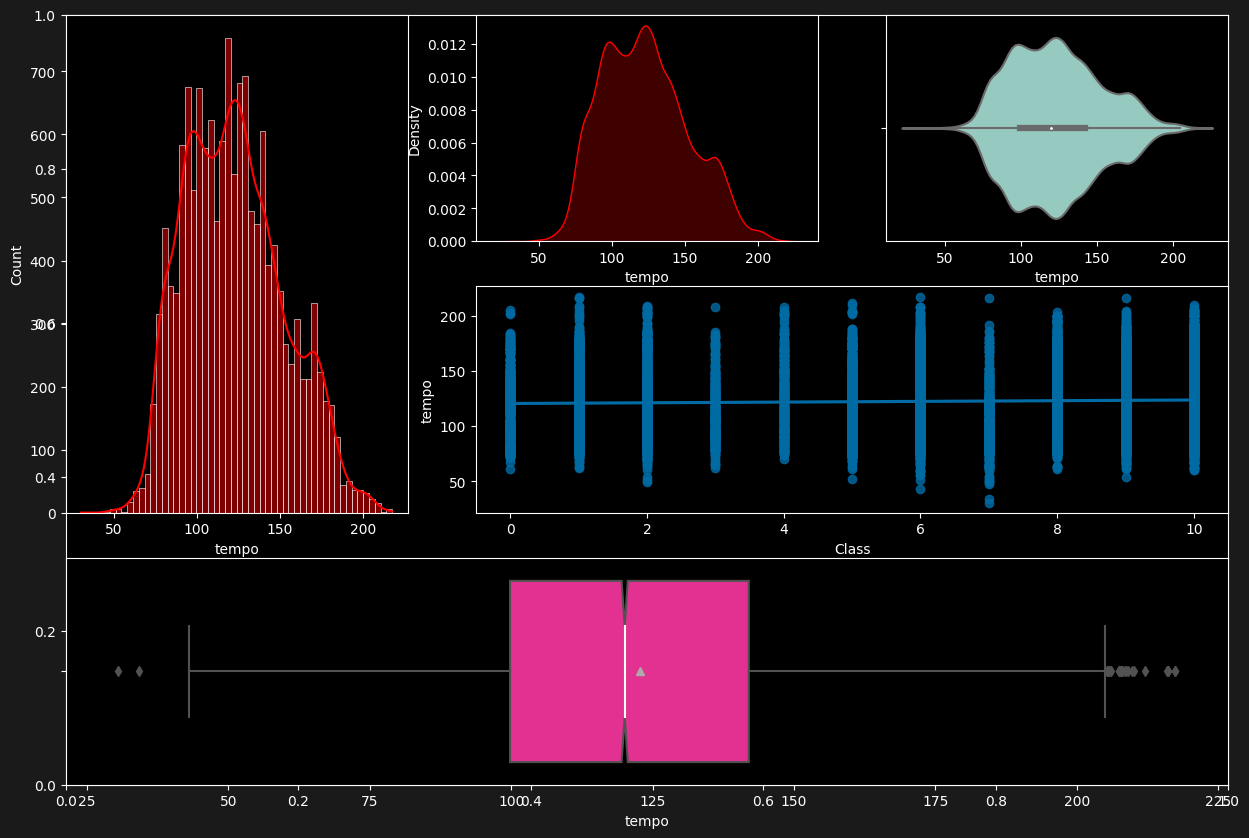

In [81]:
# tempo

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.histplot(data=train_df, x="tempo", kde=True, color='r', ax= ax["A"])

    sns.kdeplot(data =train_df, x ='tempo', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'tempo', ax=ax["C"])

    sns.regplot(data= train_df, x= 'Class', y= 'tempo', ax=ax["D"])

    sns.boxplot(data=train_df, x= 'tempo', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

 🌞
 - Most songs tempo is around 125
 - ~ normal distributed

In [82]:
# key, The key of a song can have a significant impact on the mood and feel of the song.
# For example, songs in major keys tend to sound happy and upbeat, while songs in minor keys tend to sound sad or somber.

train_df.key.value_counts().sort_values(ascending=False)

7.0     1650
9.0     1590
2.0     1582
1.0     1351
4.0     1252
11.0    1176
5.0     1115
6.0      963
8.0      872
10.0     825
3.0      411
Name: key, dtype: int64

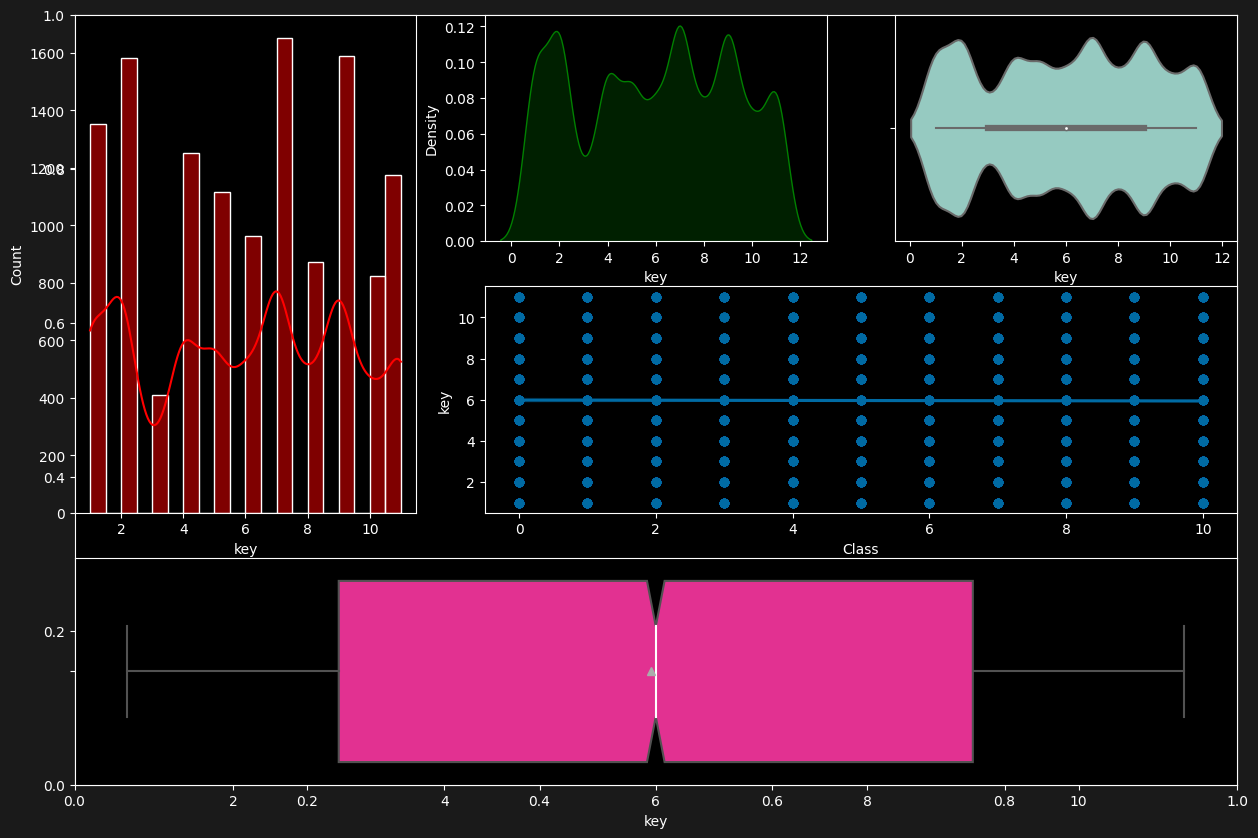

In [83]:
# key

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.histplot(data=train_df, x="key", kde=True, color='r', ax= ax["A"])

    sns.kdeplot(data =train_df, x ='key', fill =True, color= 'g', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'key', ax=ax["C"])

    sns.regplot(data= train_df, x= 'Class', y= 'key', ax=ax["D"])

    sns.boxplot(data=train_df, x= 'key', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

🌞
- all plots indicate to key 6
- key attribute has some of missing values, So i will fill them with 6

In [84]:
# instrumentalness
train_df.instrumentalness.value_counts().sort_values(ascending=False)

0.000109    18
0.929000    17
0.914000    16
0.899000    16
0.927000    15
            ..
0.000247     1
0.535000     1
0.000036     1
0.000002     1
0.550000     1
Name: instrumentalness, Length: 3945, dtype: int64

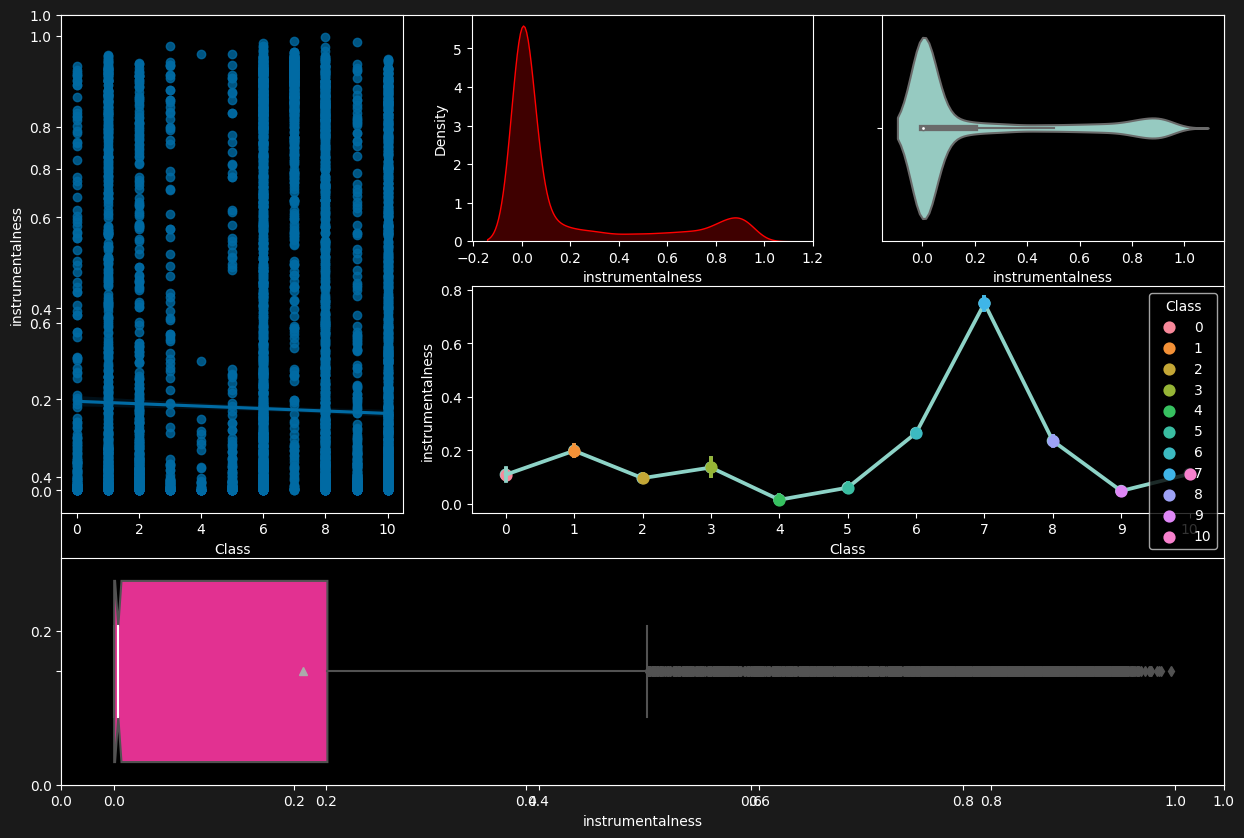

In [85]:
# instrumentalness

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.regplot(data= train_df, x= 'Class', y= 'instrumentalness', ax=ax["A"])

    sns.kdeplot(data =train_df, x ='instrumentalness', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'instrumentalness', ax=ax["C"])

    sns.pointplot(data=train_df, x="Class", y="instrumentalness", ax= ax["D"])
    sns.pointplot(data=train_df, x="Class", y="instrumentalness", hue="Class", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'instrumentalness', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

☢️
- Most songs have vocal content because the data points are around 1.5 & 0.2
- RT Skew.....

In [86]:
# mode, 1 👉🏻 major modality, 0 👉🏻 minor modality
train_df['mode'].value_counts()

1    9217
0    5179
Name: mode, dtype: int64

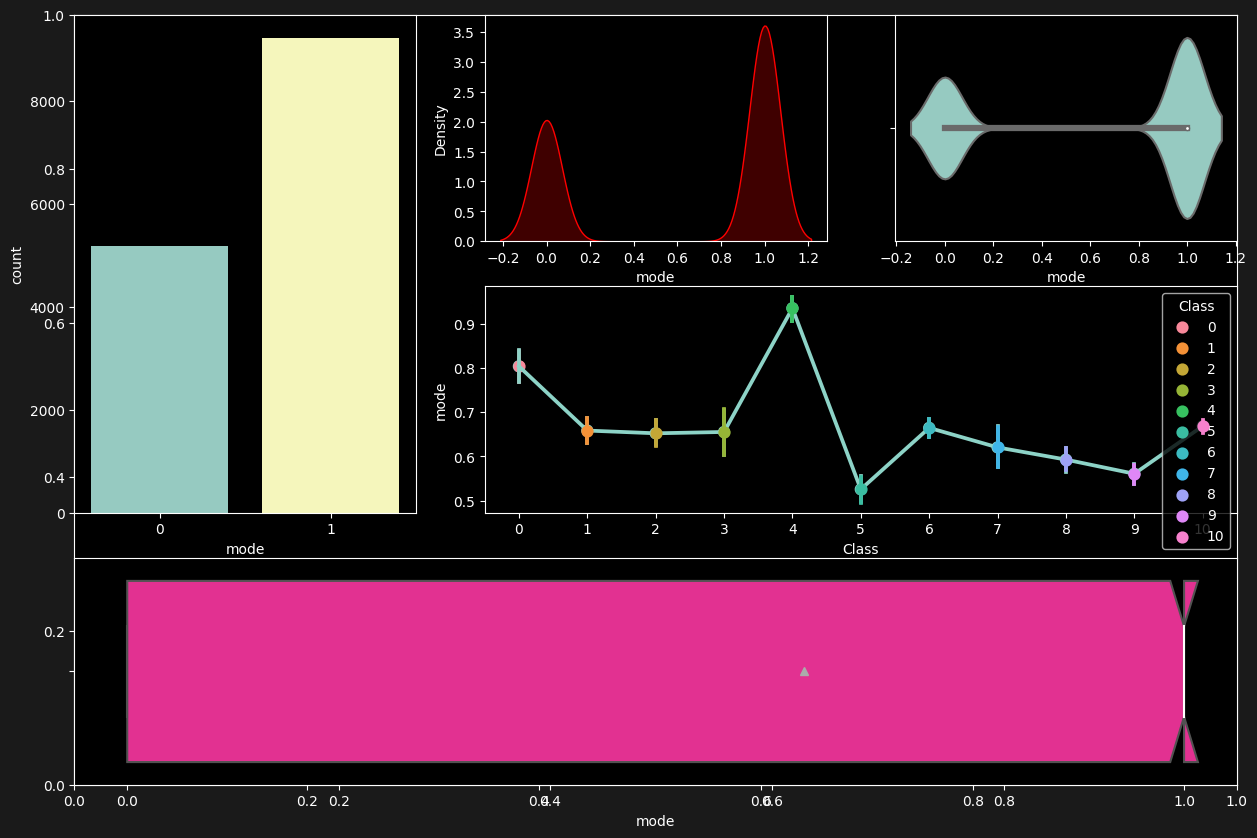

In [87]:
# mode

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.countplot(data= train_df, x= 'mode', ax=ax["A"])

    sns.kdeplot(data =train_df, x ='mode', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'mode', ax=ax["C"])

    sns.pointplot(data=train_df, x="Class", y="mode", ax= ax["D"])
    sns.pointplot(data=train_df, x="Class", y="mode", hue="Class", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'mode', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

🧐
- Major modality is the most
- median of data points is closed to 1.0

In [88]:
# speechiness
train_df.speechiness.value_counts().sort_values(ascending=False)

0.0315    63
0.0317    61
0.0310    54
0.0339    54
0.0302    53
          ..
0.8720     1
0.0760     1
0.0989     1
0.5200     1
0.3830     1
Name: speechiness, Length: 1177, dtype: int64

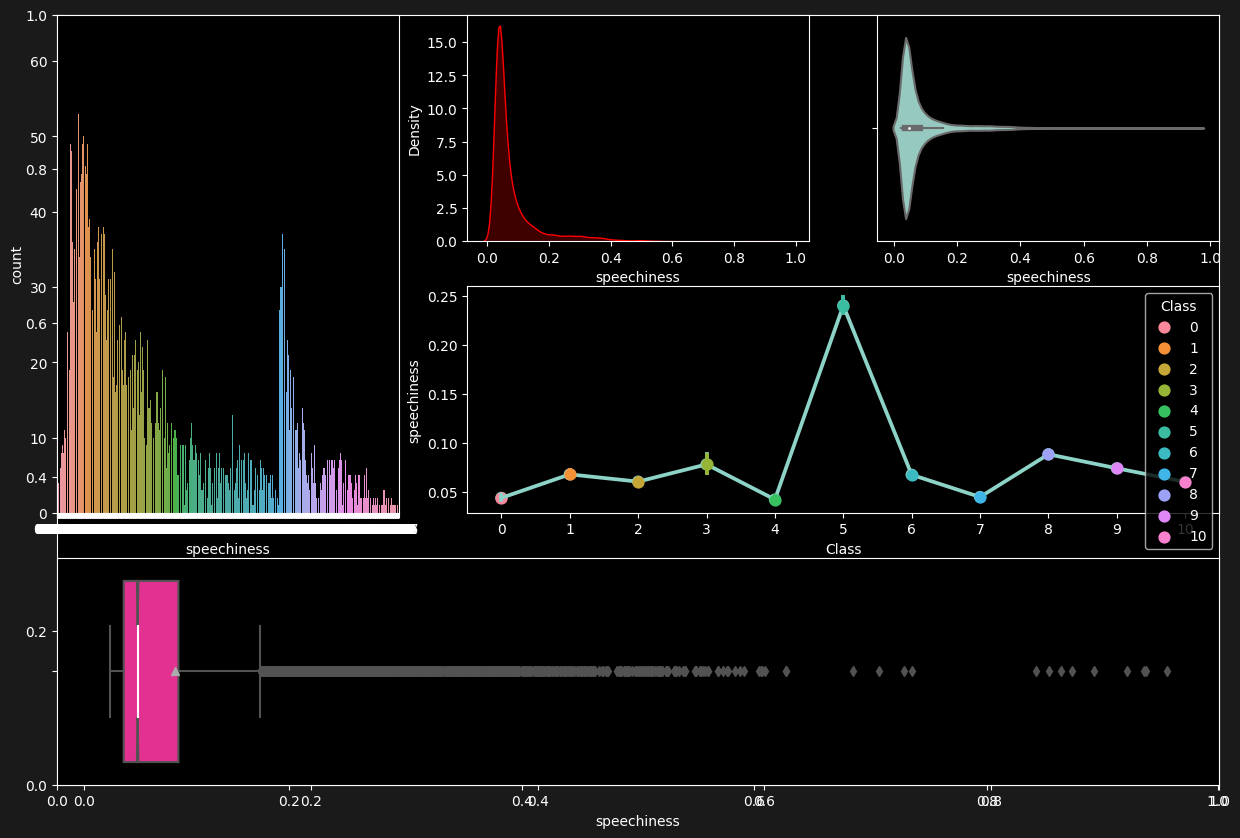

In [89]:
# speechiness

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.countplot(data= train_df, x= 'speechiness', ax=ax["A"])

    sns.kdeplot(data =train_df, x ='speechiness', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'speechiness', ax=ax["C"])

    sns.pointplot(data=train_df, x="Class", y="speechiness", ax= ax["D"])
    sns.pointplot(data=train_df, x="Class", y="speechiness", hue="Class", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'speechiness', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

🧐
- Most values are below 0.33, so most them are music not poetry or audio show
- Let Skew....
- The outliers indicate that there are values represent talk show, audio book, poetry....

In [90]:
# valence 👉🏼 A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
train_df.valence.value_counts().sort_values(ascending=False)

0.3890    38
0.3520    34
0.3990    34
0.3690    34
0.5890    33
          ..
0.0612     1
0.0516     1
0.0961     1
0.0556     1
0.0947     1
Name: valence, Length: 1268, dtype: int64

In [91]:
print('Numbe of Songs that > 50% telt to be positive🟢 👉🏼 ', len(train_df.valence[train_df.valence >= 0.50]))
print('----')

print('Number of Songs that < 50% telt to be negative⛔ 👉🏼 ', len(train_df.valence[train_df.valence <= 0.50]))

Numbe of Songs that > 50% telt to be positive🟢 👉🏼  6812
----
Number of Songs that < 50% telt to be negative⛔ 👉🏼  7614


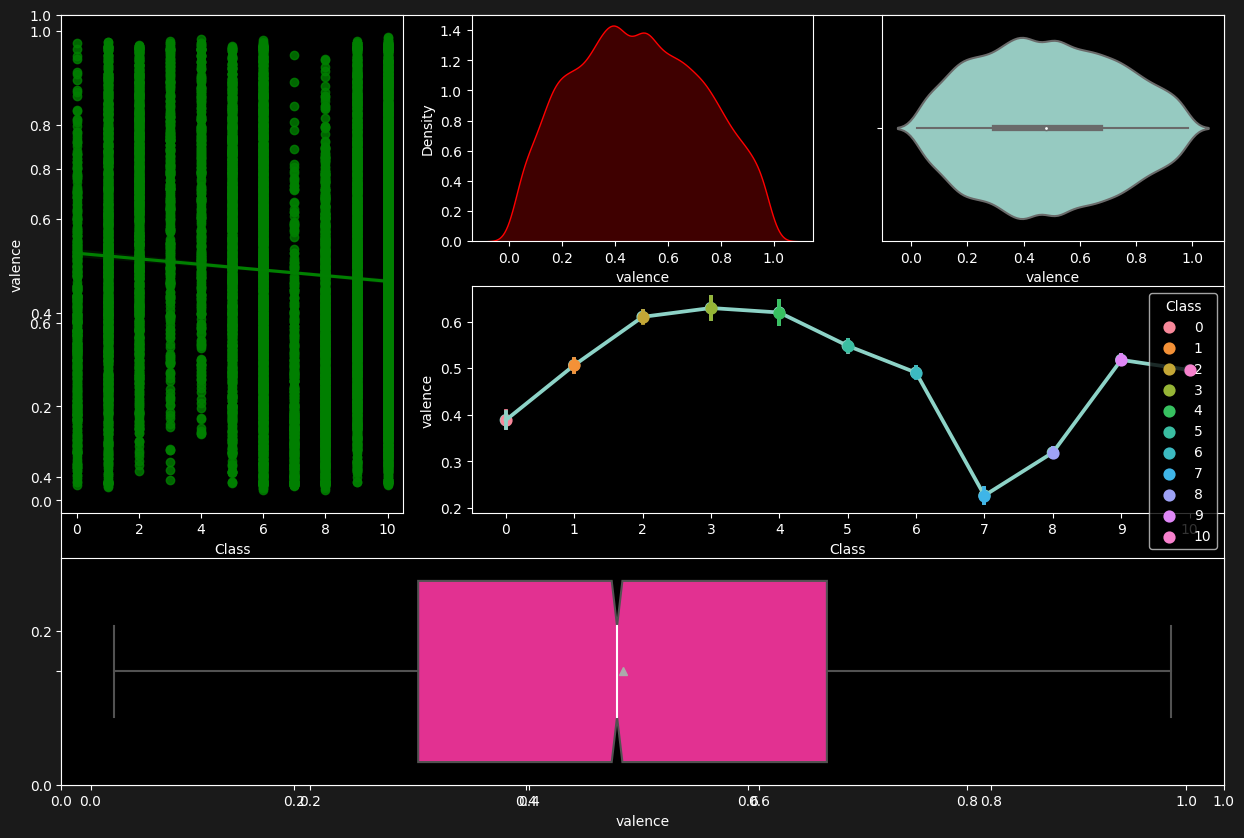

In [92]:
# valence 👉🏼 A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.regplot(data= train_df, x= 'Class', y= 'valence', color= 'g', ax=ax["A"])

    sns.kdeplot(data =train_df, x ='valence', fill =True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'valence', ax=ax["C"])

    sns.pointplot(data=train_df, x="Class", y="valence", ax= ax["D"])
    sns.pointplot(data=train_df, x="Class", y="valence", hue="Class", ax= ax["D"])

    sns.boxplot(data=train_df, x= 'valence', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

In [93]:
# danceability
train_df.danceability.value_counts().sort_values(ascending=False)

0.5520    54
0.5320    48
0.5270    47
0.5290    47
0.6010    47
          ..
0.1830     1
0.1550     1
0.9680     1
0.0814     1
0.0896     1
Name: danceability, Length: 887, dtype: int64

In [94]:
train_df.corr()['danceability'].sort_values(ascending= False)

danceability          1.000000
valence               0.444798
speechiness           0.202985
Popularity            0.172907
time_signature        0.137127
loudness              0.056193
key                   0.007667
acousticness          0.007414
mode                 -0.069311
energy               -0.094806
Class                -0.101152
liveness             -0.105949
duration_in min/ms   -0.127245
tempo                -0.180764
instrumentalness     -0.203278
Name: danceability, dtype: float64

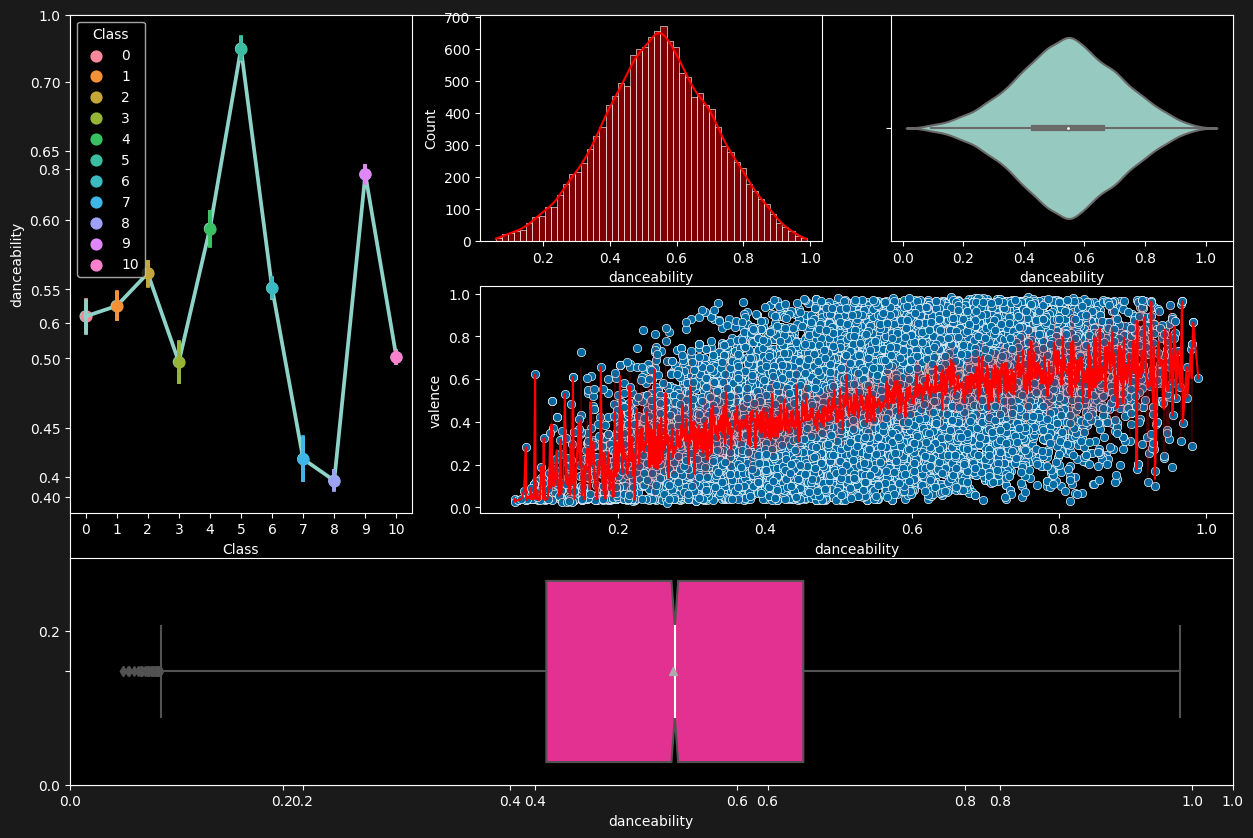

In [95]:
# danceability

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.pointplot(data=train_df, x="Class", y="danceability", ax= ax["A"])
    sns.pointplot(data=train_df, x="Class", y="danceability", hue="Class", ax= ax["A"])

    sns.histplot(data =train_df, x ='danceability', kde= True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'danceability', ax=ax["C"])

    sns.scatterplot(data= train_df, x= 'danceability', y= 'valence', ax=ax["D"])
    sns.lineplot(data=train_df, x='danceability', y='valence', color= 'r', ax= ax["D"])

    sns.boxplot(data=train_df, x= 'danceability', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

🐔
- Class 5 has songshave more dancibility
- Class 7 & 8 have songs have less dancibility
- Look to pointplot to note

In [96]:
# acousticness
train_df.acousticness.value_counts().sort_values(ascending=False)

0.102000    27
0.128000    24
0.130000    24
0.135000    23
0.124000    22
            ..
0.057000     1
0.000257     1
0.000861     1
0.000001     1
0.000005     1
Name: acousticness, Length: 3725, dtype: int64

In [97]:
train_df.corr()['acousticness'].sort_values(ascending= False)

acousticness          1.000000
instrumentalness      0.182656
mode                  0.020817
danceability          0.007414
key                  -0.007678
speechiness          -0.084849
liveness             -0.109400
valence              -0.127707
Popularity           -0.128886
time_signature       -0.139500
tempo                -0.162988
Class                -0.240609
duration_in min/ms   -0.321357
loudness             -0.614967
energy               -0.746436
Name: acousticness, dtype: float64

In [98]:
# 1.0 represents high confidence the track is acoustic

print('👉🏼 ', len(train_df.acousticness[train_df.acousticness >= 0.80]))
print('----')

print('👉🏼 ', len(train_df.acousticness[train_df.acousticness <= 0.80]))

👉🏼  1477
----
👉🏼  12926


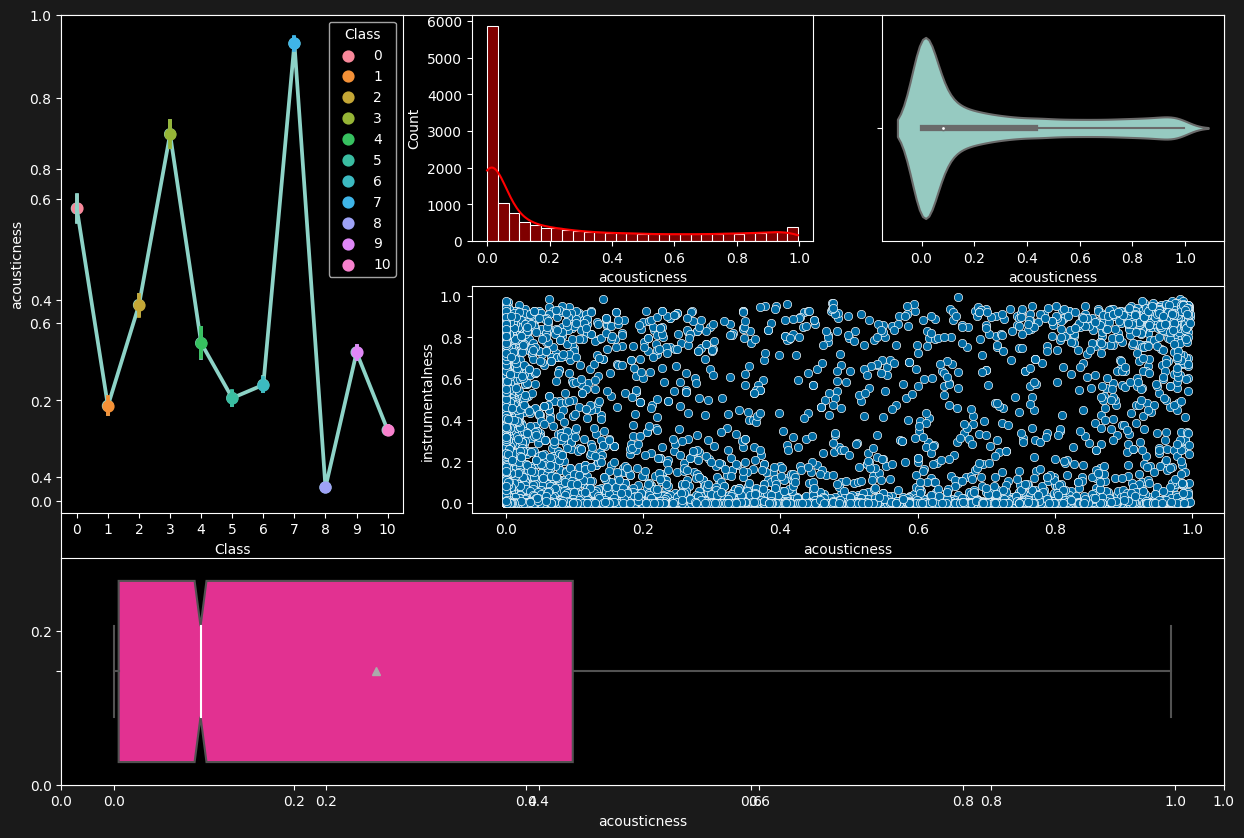

In [99]:
# acousticness

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

# Set the colors
colors = ["r", 'b', "#834986", '#333475', '#123756', "#345123", "w", "#534992", '#887234', "#235986"]

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    EEE
    """
)

with plt.style.context('dark_background'):

    sns.pointplot(data=train_df, x="Class", y="acousticness", ax= ax["A"])
    sns.pointplot(data=train_df, x="Class", y="acousticness", hue="Class", ax= ax["A"])

    sns.histplot(data =train_df, x ='acousticness', kde= True, color= 'r', ax =ax["B"])

    sns.violinplot(data=train_df, x= 'acousticness', ax=ax["C"])

    sns.scatterplot(data= train_df, x= 'acousticness', y= 'instrumentalness', ax=ax["D"])

    sns.boxplot(data=train_df, x= 'acousticness', showmeans= True,
                color='deeppink', ax=ax["E"], notch=True, medianprops={"color": "w"})

plt.show()

🐓
- Most songs are not acoustic, because most points are close to zero

🎉


```
Read, Interpret, Visualize & deep dive in data, all those are Done 🎇
```

# `3- Feature Engineering ⚙️👨🏽‍🔬`

A- Handle A Missing Values 🥥

In [100]:
# Popularity is distributed normal, So here i fill it with `mean`
train_df['Popularity'] = train_df['Popularity'].fillna(train_df['Popularity'].mean())

# key values are distributed as `Multimodal`, So here i fill the missing values with most frequent value
train_df['key'] = train_df['key'].fillna(train_df['key'].mode()[0])

# instrumentalness is RT Skew, so we have to fill with msdian, but here i fill with mean because it more represanted for data points
train_df['instrumentalness'] = train_df['instrumentalness'].fillna(train_df['instrumentalness'].mean())

# Check
assert (train_df.isnull().any().sum() == 0)

B- Handle Categorical Attributes 🧹


In [101]:
# here i will delete them
train_df.drop(['Artist Name', 'Track Name'], axis=1, inplace= True)

# Check
assert (train_df.select_dtypes('object') == '0').all().all()

# `4- Data Split ✂️`

In [102]:
# Set the target
y = train_df['Class']
print(y.shape)
print()

X = train_df.drop(['Class'], axis=1)
print(X.shape)

(14396,)

(14396, 14)


Handle An Un-balanced Classes 🥥

In [103]:
# summarize class distribution
print("Before Treat Un-Balance 👉🏽", Counter(y))
print()

# Get the count of the majority class
majority_count = max(Counter(y).values())

# Define oversampling strategy
sampling_strategy = {cls: majority_count for cls in set(y)}

# Create RandomOverSampler object
oversample = RandomOverSampler(sampling_strategy =sampling_strategy)

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Summarize class distribution after oversampling
print("After Treat Un-Balance 👉🏽", Counter(y_over))

Before Treat Un-Balance 👉🏽 Counter({10: 3959, 6: 2069, 9: 2019, 8: 1483, 5: 1157, 1: 1098, 2: 1018, 0: 500, 7: 461, 3: 322, 4: 310})

After Treat Un-Balance 👉🏽 Counter({9: 3959, 6: 3959, 10: 3959, 2: 3959, 5: 3959, 0: 3959, 8: 3959, 4: 3959, 3: 3959, 1: 3959, 7: 3959})


In [104]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42)

# `5- Model Building 💢`

5.1- Random Forest Algorithm 🎾

In [ ]:
# instantiate the model
RF = RandomForestClassifier()

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

In [105]:
# Bring the best params & put them 👇
rf_model = RandomForestClassifier(
    n_estimators=300,
    bootstrap=True,
    max_depth=100,
    max_features=3,
    min_samples_leaf=5,
    min_samples_split=12
)

rf_model.fit(X_train, y_train)

rf_predict = rf_model.predict(X_test)

accuracy_score(y_test, rf_predict)

0.8422116091109478

`Test Data 🪀`

In [106]:
# Test data activate
test_df = pd.read_csv('test (2).csv', index_col= 'Id')

# Drop ...
test_df = test_df.drop(['Artist Name', 'Track Name'], axis=1)

# Fill missing values
test_df['Popularity'] = test_df['Popularity'].fillna(test_df['Popularity'].mean())
test_df['key'] = test_df['key'].fillna(test_df['key'].mode()[0])
test_df['instrumentalness'] = test_df['instrumentalness'].fillna(test_df['instrumentalness'].mean())

# Check
assert (test_df.isnull().any().sum() == 0)

In [107]:
sample = pd.read_csv('sample_submission (2).csv')

#sample.head()

In [108]:
rf_predict_ = rf_model.predict(test_df)

sample["Class"]= rf_predict_
sample.to_csv('RF_model.csv', index = False)
sample

,Id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,10
4,14401,5
...,...,...
3595,17992,10
3596,17993,5
3597,17994,1
3598,17995,2


In [109]:
# Save the model using joblib
joblib.dump(rf_model, 'rf_model.pkl')

# Convert the model to a JSON string
model_params = rf_model.get_params()
model_json = json.dumps(model_params)

# Save the JSON string to a file
with open('rf_model.json', 'w') as file:
    file.write(model_json)

5.2- LightGBM Algorithm 🎾

In [112]:
# Define the LightGBM classifier
lgbm_Model = lgb.LGBMClassifier()

# Define the hyperparameter search space for Bayesian optimization

params_space = {
    'num_leaves': (10, 200),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'subsample': (0.1, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
    'max_depth': (3, 20),
    'min_child_weight': (1, 10),
    'reg_alpha': (0.0, 1.0, 'uniform'),
    'reg_lambda': (0.0, 1.0, 'uniform'),
    'min_split_gain': (0.001, 0.1),
    'min_data_in_leaf': (10, 100),
    'cat_smooth': (1, 20),
    'bagging_freq': (1, 10)
}

# Perform Bayesian optimization
optimizer = BayesSearchCV(lgbm_Model, params_space, n_iter=20, random_state=42, cv=5)
optimizer.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = optimizer.best_params_

# Train the final LightGBM model with the best hyperparameters
Lgbm_Model = lgb.LGBMClassifier(**best_params)
Lgbm_Model.fit(X_train, y_train)

# Make predictions on the test set
lgbm_pred = Lgbm_Model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, lgbm_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Cu

In [113]:
lg_predict_ = Lgbm_Model.predict(test_df)

sample["Class"]= lg_predict_
sample.to_csv('LGBM_model.csv', index = False)
sample

,Id,Class
0,14397,6
1,14398,6
2,14399,9
3,14400,10
4,14401,5
...,...,...
3595,17992,10
3596,17993,9
3597,17994,1
3598,17995,2


In [114]:
 # Save the model using joblib
joblib.dump(Lgbm_Model, 'lgbm_model.pkl')

# Convert the model to a JSON string
model_params = Lgbm_Model.get_params()
model_json = json.dumps(model_params)

# Save the JSON string to a file
with open('Lgbm_Model.json', 'w') as file:
    file.write(model_json)

# `6- Evaluate Or Test Models 🔋`

6.1- Evaluate random forest algorithm 🧑🏿‍⚖️

In [115]:
# Obtaining feature importances
rf_model.feature_importances_

array([0.08591553, 0.06699414, 0.09139574, 0.02116406, 0.07270067,
       0.00945883, 0.09246367, 0.11388567, 0.08328738, 0.04295382,
       0.07974863, 0.04122834, 0.19476741, 0.00403612])

In [116]:
# Obtaining feature names
rf_model.feature_names_in_

array(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype=object)

In [117]:
# Classification report
cls_rep = classification_report(y_test, rf_predict)

print(cls_rep)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       959
           1       0.75      0.77      0.76       966
           2       0.78      0.96      0.86       973
           3       0.99      1.00      0.99       996
           4       0.97      1.00      0.99       969
           5       0.87      0.95      0.91       984
           6       0.69      0.58      0.63       993
           7       1.00      1.00      1.00      1001
           8       0.78      0.93      0.85      1028
           9       0.77      0.75      0.76       988
          10       0.58      0.35      0.44      1031

    accuracy                           0.84     10888
   macro avg       0.83      0.84      0.83     10888
weighted avg       0.83      0.84      0.83     10888



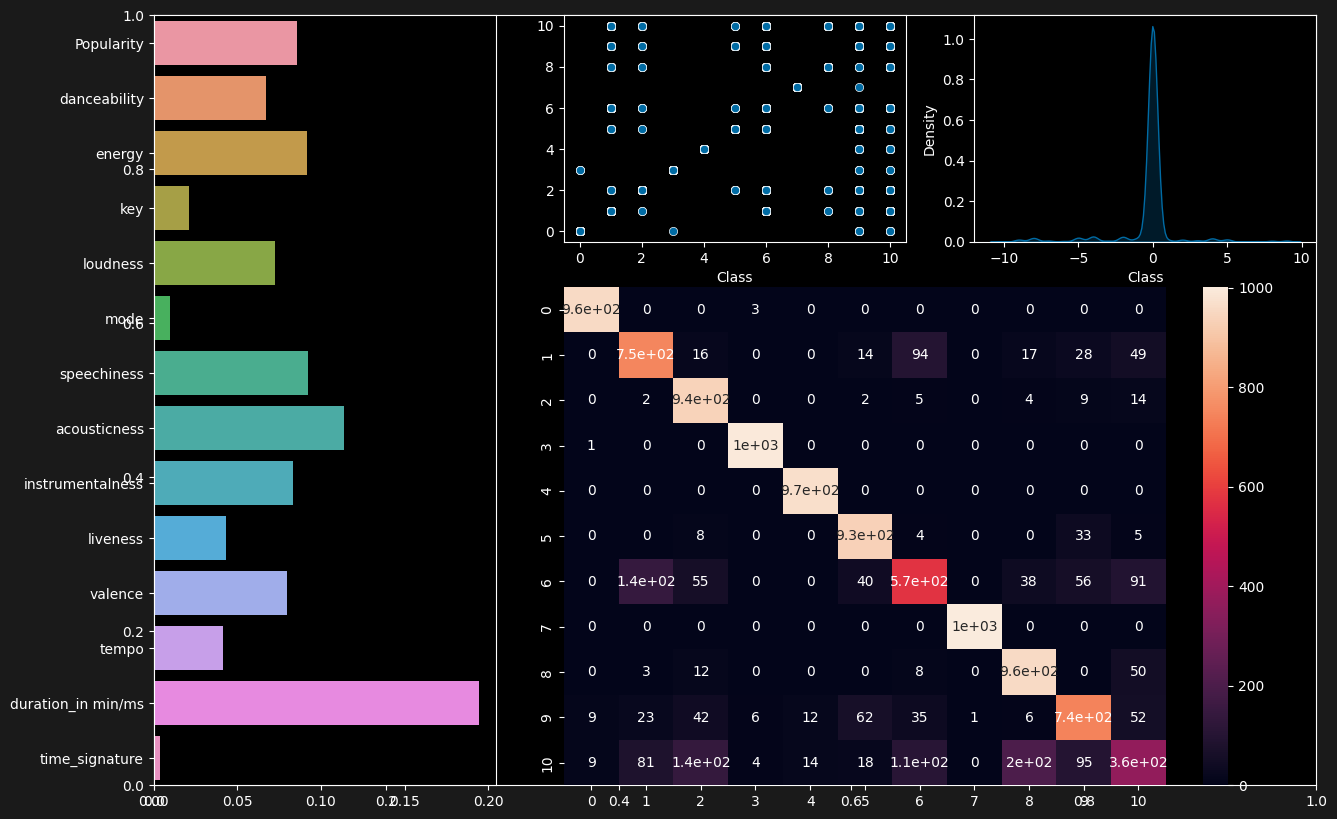

In [118]:
# Evaluation Graphs About random forest

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    ADD
    """
)

with plt.style.context('dark_background'):
  sns.barplot(x=rf_model.feature_importances_, y= rf_model.feature_names_in_, ax=ax["A"])

  sns.scatterplot(x=y_test, y=rf_predict, ax=ax["B"])

  sns.kdeplot(rf_predict - y_test, fill =True, ax =ax["C"])

  sns.heatmap(confusion_matrix(y_test, rf_predict), annot = True, ax=ax["D"])

plt.show()

6.2- Evaluate Lightgbm algorithm 🧑🏿‍⚖️

In [127]:
# Obtaining feature importances
Lgbm_Model.feature_importances_

array([3949, 4732, 4401, 1459, 4368,  151, 4652, 4692, 4008, 4617, 4483,
       4666, 4114,   77], dtype=int32)

In [129]:
# Obtaining feature names
Lgbm_Model.feature_name_

['Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in_min/ms',
 'time_signature']

In [130]:
# Classification report
cls_rep = classification_report(y_test, lgbm_pred)

print(cls_rep)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       959
           1       0.73      0.83      0.78       966
           2       0.88      0.96      0.91       973
           3       0.99      1.00      1.00       996
           4       0.98      1.00      0.99       969
           5       0.93      0.96      0.94       984
           6       0.68      0.65      0.66       993
           7       1.00      1.00      1.00      1001
           8       0.84      0.94      0.89      1028
           9       0.82      0.81      0.81       988
          10       0.62      0.41      0.49      1031

    accuracy                           0.87     10888
   macro avg       0.86      0.87      0.86     10888
weighted avg       0.86      0.87      0.86     10888



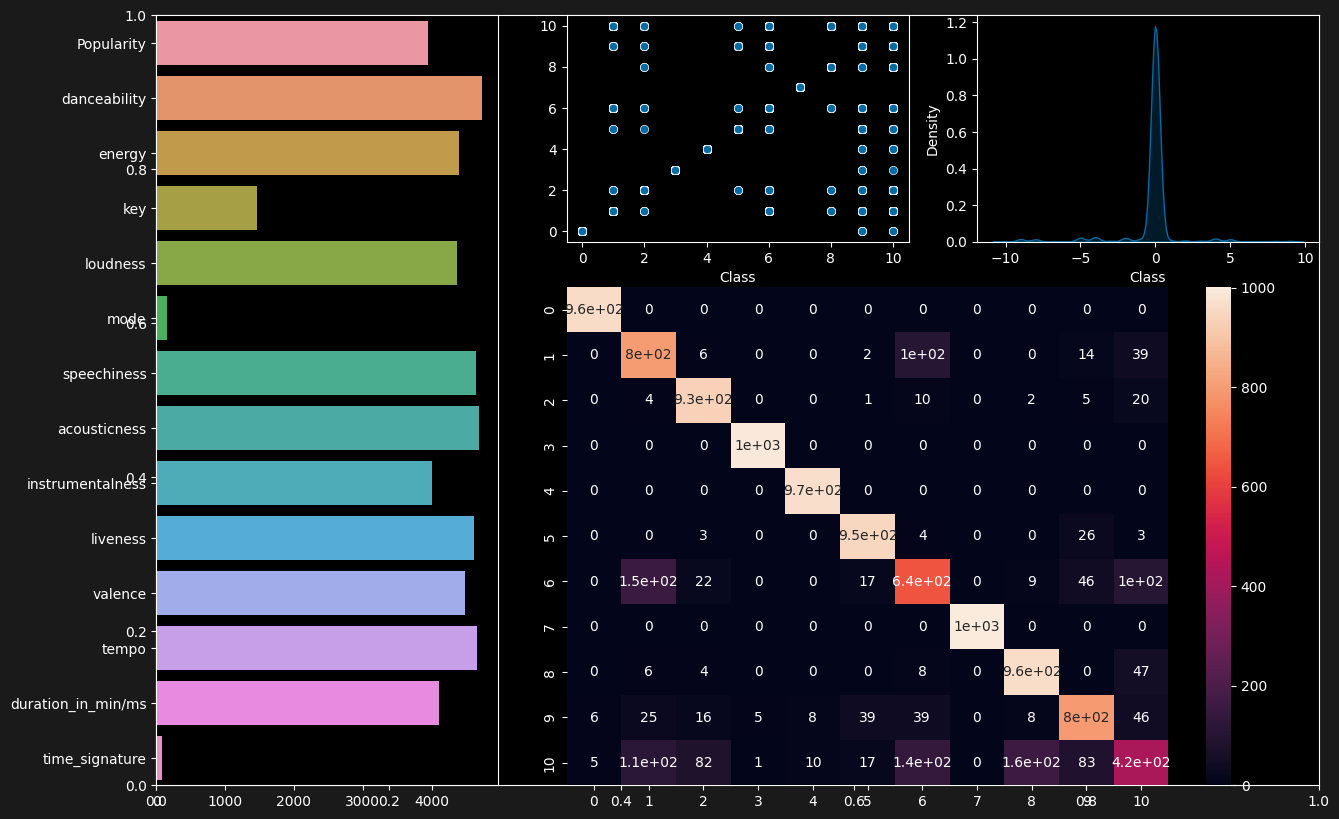

In [131]:
# Evaluation Graphs about LGBM

fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('0.1')

ax = fig.subplot_mosaic(
    """
    ABC
    ADD
    ADD
    """
)

with plt.style.context('dark_background'):
  sns.barplot(x=Lgbm_Model.feature_importances_, y= Lgbm_Model.feature_name_, ax=ax["A"])

  sns.scatterplot(x=y_test, y=lgbm_pred, ax=ax["B"])

  sns.kdeplot(lgbm_pred - y_test, fill =True, ax =ax["C"])

  sns.heatmap(confusion_matrix(y_test, lgbm_pred), annot = True, ax=ax["D"])

plt.show()